In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
#读取数据集
df_train = pd.read_csv('./dataset/train.csv')
df_test = pd.read_csv('./dataset/test.csv')

#展示数据信息
df_train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [3]:
#检查有无重复的ID
idsUni = len(set(df_train.Id))
idsTotal = len(df_train.Id)
idsDupli = idsUni - idsTotal
print('重复的id:{}'.format(idsDupli))

#删除训练集与测试集的ID列
df_train_Id = df_train['Id']
df_test_Id = df_test['Id']
df_train.drop('Id', axis = 1, inplace = True)
df_test.drop('Id', axis = 1, inplace = True)

#数据集大小
print('训练集大小: {}'.format(df_train.shape))
print('测试集大小: {}'.format(df_test.shape))

重复的id:0
训练集大小: (1460, 80)
测试集大小: (1459, 79)


In [4]:
#展示列标签
print(df_train.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [5]:
df_train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_test.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<AxesSubplot:>

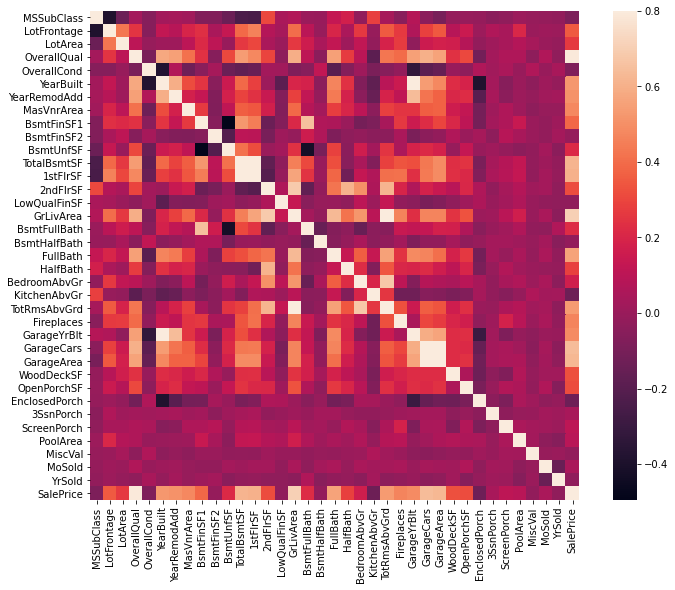

In [7]:
#协方差
corrmat = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square=True)

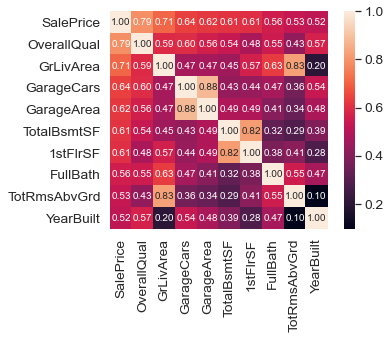

In [8]:
#和售价的协方差
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


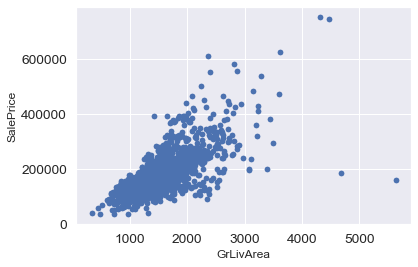

In [9]:
data = pd.concat({"GrLivArea":df_train, "SalePrice":df_train})
data.plot(x = "GrLivArea", y = "SalePrice", kind = "scatter")
plt.ylabel('SalePrice', fontsize=12)
plt.xlabel('GrLivArea', fontsize=12)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


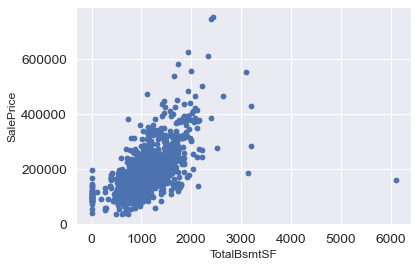

In [10]:
data = pd.concat({"TotalBsmtSF":df_train, "SalePrice":df_train})
data.plot(x = "TotalBsmtSF", y = "SalePrice", kind = "scatter")
plt.ylabel('SalePrice', fontsize=12)
plt.xlabel('TotalBsmtSF', fontsize=12)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


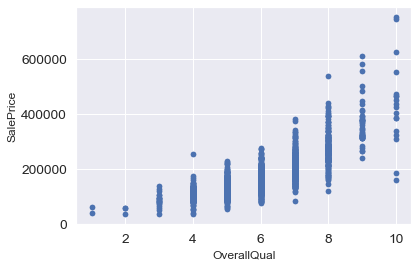

In [11]:
data = pd.concat({"OverallQual":df_train, "SalePrice":df_train})
data.plot(x = "OverallQual", y = "SalePrice", kind = "scatter")
plt.ylabel('SalePrice', fontsize=12)
plt.xlabel('OverallQual', fontsize=12)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


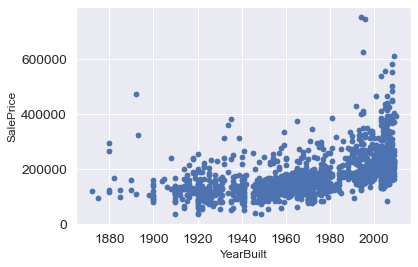

In [12]:
data = pd.concat({"YearBuilt":df_train, "SalePrice":df_train})
data.plot(x = "YearBuilt", y = "SalePrice", kind = "scatter")
plt.ylabel('SalePrice', fontsize=12)
plt.xlabel('YearBuilt', fontsize=12)
plt.show()

In [13]:
#删除异常点

df_train = df_train.drop(df_train[(df_train['OverallQual']<5) &
                                        (df_train['SalePrice']>200000)].index)
 
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) &
                                        (df_train['SalePrice']<300000)].index)
 
df_train = df_train.drop(df_train[(df_train['YearBuilt']<1900) &
                                        (df_train['SalePrice']>400000)].index)

df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>6000) &
                                        (df_train['SalePrice']<200000)].index)

In [14]:
#查看现在训练集大小
print('训练集大小: {}'.format(df_train.shape))

训练集大小: (1456, 80)


Skewness: 1.882346
Kurtosis: 6.595596


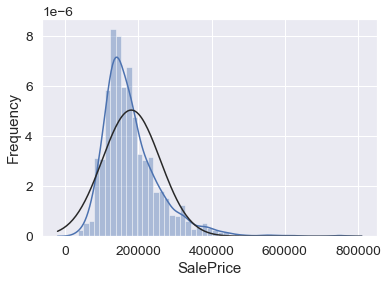

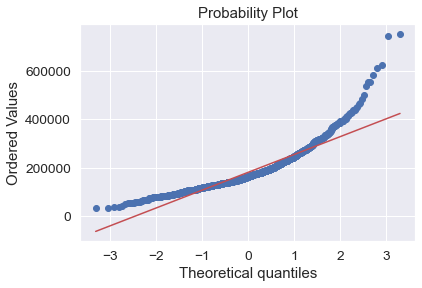

In [15]:
# 计算偏度和峰度
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

#绘制直方图
sns.distplot(df_train['SalePrice'], fit = norm)
plt.ylabel('Frequency')
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

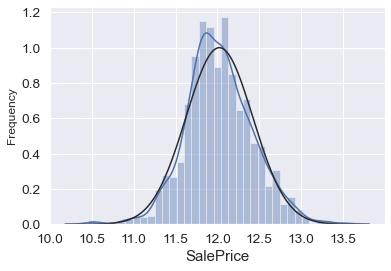

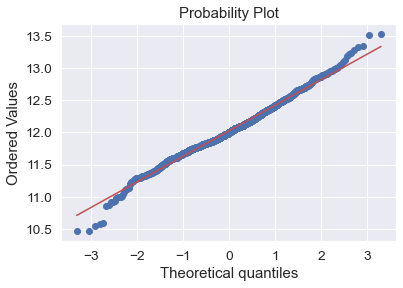

In [16]:
#we use log1p function for 'SalePrice' column
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

#then plot the target again
sns.distplot(df_train['SalePrice'], fit = norm)
plt.ylabel('Frequency', fontsize=12)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

In [17]:
n_train = df_train.shape[0]
n_test = df_test.shape[0]
y_train = df_train['SalePrice'].values
df_train.drop('SalePrice', axis=1, inplace=True)

#将训练集和测试集连接
df_all = pd.concat((df_train, df_test)).reset_index(drop = True)
print('df_all siza: {}'.format(df_all.shape))

df_all siza: (2915, 79)


In [18]:
#查看缺失值
df_all_NA = pd.isnull(df_all).sum().sort_values(ascending=False)
NA_percent = ((df_all_NA / len(df_all))*100).sort_values(ascending=False)
df_all_NA = pd.concat([df_all_NA, NA_percent], axis=1, keys=['Number', 'Percent'])
print('df_all_NA siza: {}'.format(df_all_NA.shape))

df_all_NA siza: (79, 2)


In [19]:
df_all_NA.head(35)

,Number,Percent
PoolQC,2906,99.691252
MiscFeature,2810,96.397942
Alley,2717,93.207547
Fence,2345,80.445969
FireplaceQu,1420,48.713551
LotFrontage,485,16.638079
GarageYrBlt,159,5.454545
GarageFinish,159,5.454545
GarageQual,159,5.454545
GarageCond,159,5.454545


In [20]:
#丢掉缺失较多的特征
df_all = df_all.drop((df_all_NA[df_all_NA['Percent'] > 60].index), 1)
print('df_all size: {}'.format(df_all.shape))

df_all size: (2915, 75)


In [21]:
#处理缺失值

df_all['LotFrontage'] = df_all.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

for c in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath', 'MasVnrArea'):
    df_all[c] = df_all[c].fillna(0)
    
for c in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    df_all[c] = df_all[c].fillna('None')

df_all['MSZoning'] = df_all['MSZoning'].fillna(df_all['MSZoning'].mode()[0])

df_all = df_all.drop(['Utilities'], axis=1)

df_all["Functional"] = df_all["Functional"].fillna("Typ")

df_all['Electrical'] = df_all['Electrical'].fillna(df_all['Electrical'].mode()[0])

df_all['KitchenQual'] = df_all['KitchenQual'].fillna(df_all['KitchenQual'].mode()[0])

df_all['Exterior1st'] = df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])

df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])

df_all['SaleType'] = df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])

In [22]:
#检查是否有缺失
print(pd.isnull(df_all).sum().sort_values(ascending=False))

FireplaceQu      1420
GarageType          0
Fireplaces          0
Functional          0
TotRmsAbvGrd        0
                 ... 
ExterQual           0
MasVnrArea          0
MasVnrType          0
Exterior2nd         0
SaleCondition       0
Length: 74, dtype: int64


In [23]:
#将object类型转换成str

df_all['OverallCond'] = df_all['OverallCond'].astype(str)
df_all['MSSubClass'] = df_all['MSSubClass'].astype(str)
df_all['YrSold'] = df_all['YrSold'].astype(str)
df_all['MoSold'] = df_all['MoSold'].astype(str)

In [24]:
#对有连续特征的离散特征使用LabelEncoder
from sklearn.preprocessing import LabelEncoder

cols = ('BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_all[c].values)) 
    df_all[c] = lbl.transform(list(df_all[c].values))
     
print('df_all size: {}'.format(df_all.shape))

df_all size: (2915, 74)


In [25]:
#查看数据偏度
numeric_feature = df_all.dtypes[df_all.dtypes != 'object'].index
skewed_feature = df_all[numeric_feature].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'skew': skewed_feature})
skewness.head(10)

,skew
MiscVal,21.932147
PoolArea,17.682542
LotArea,13.279061
LowQualFinSF,12.407713
3SsnPorch,11.368094
LandSlope,4.993598
KitchenAbvGr,4.298845
BsmtFinSF2,4.142863
EnclosedPorch,4.000796
ScreenPorch,3.931624


In [26]:
#使用box-cox变换
skewness = skewness[abs(skewness) > 0.5]
print('{} skewed numerical features for Box Cox transform'.format(len(skewness)))

from scipy.special import boxcox1p
lam=1.5
for f in skewness.index:
    df_all[f] = boxcox1p(df_all[f], lam)

54 skewed numerical features for Box Cox transform


In [27]:
#创建one-hot编码
df_all = pd.get_dummies(df_all)
print('df_all size: {}'.format(df_all.shape))

df_all size: (2915, 215)


In [28]:
#将测试集和训练集分开
X_train = df_all[:n_train]
X_test = df_all[n_train:]

In [29]:
#交叉验证
from sklearn.model_selection import KFold, cross_val_score, train_test_split

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = 5))
    return rmse

In [30]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error

In [31]:
#LASSO
lasso = Lasso(alpha =0.0005, random_state=1)
score_lasso = rmse_cv(lasso)

In [32]:
#ElasticNet
ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
score_ENet = rmse_cv(ENet)

In [33]:
#Kernel Ridge Regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score_KRR = rmse_cv(KRR)


In [34]:
#Gradient Boosting Regression
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score_GBoost = rmse_cv(GBoost)


In [35]:
#XGBoost
import xgboost as xgb
xgbr_params = {'learning_rate': 0.01,
      'n_estimators': 3000, 
      'max_depth': 5,
      'subsample': 0.6,
      'colsample_bytree': 0.7,
      'min_child_weight': 3,
      'seed': 52,
      'gamma': 0,
      'reg_alpha': 0,
      'reg_lambda': 1}
xgbr = xgb.XGBRegressor(**xgbr_params)
score_xgb = rmse_cv(xgbr)

In [36]:
#LightGBM
import lightgbm as lgb
lgbr_params = {'learning_rate': 0.01,
      'n_estimators': 1850, 
      'max_depth': 4,
      'num_leaves': 20,
      'subsample': 0.6,
      'colsample_bytree': 0.6,
      'min_child_weight': 0.001,
      'min_child_samples': 21,
      'random_state': 42,
      'reg_alpha': 0,
      'reg_lambda': 0.05}
lgbr = lgb.LGBMRegressor(**lgbr_params)
score_lgb = rmse_cv(lgbr)


In [37]:
models = pd.DataFrame({
    'Model': ['LASSO Regression', 'Elastic Net Regression', 'Kernel Ridge Regression', 
              'Gradient Boosting Regression','XGBoost','LightGBM'],
    'Score': [score_lasso.mean(), score_ENet.mean(), score_KRR.mean(), score_GBoost.mean(), score_xgb.mean(), score_lgb.mean()]})
models.sort_values(by = 'Score', ascending=True)

,Model,Score
4,XGBoost,0.113414
1,Elastic Net Regression,0.116323
0,LASSO Regression,0.116339
5,LightGBM,0.117600
3,Gradient Boosting Regression,0.118676
2,Kernel Ridge Regression,4.306016


In [38]:
def get_stacking():
    level0 = list()
    level0.append(('ENet', ENet))
    level0.append(('GBoost', GBoost))
    #level0.append(('KRR', KRR))
    level0.append(('model_xgb',xgbr))
    level0.append(('model_lgb',lgbr))
    level1 = lasso
    
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [39]:
stacking_model = get_stacking()
score_stack = rmse_cv(stacking_model)
print('Staching Model score: {}'.format(score_stack.mean()))

Staching Model score: 0.10922721541468983


In [40]:
print(np.expm1(y_train))

[208500. 181500. 223500. ... 266500. 142125. 147500.]


In [41]:
stacking_model.fit(X_train.values, y_train)
stacking_y_pred = stacking_model.predict(X_train.values)
stacking_pred = np.expm1(stacking_model.predict(X_test.values))
print(np.sqrt(mean_squared_error(y_train, stacking_y_pred)))

0.060968070569178134


In [42]:
print(stacking_pred)

[120625.28407877 156804.06129062 182054.82177732 ... 165327.91935489
 114988.53744691 226465.10856129]


In [43]:
#输出结果
output = pd.DataFrame({'Id': df_test_Id, 'SalePrice': stacking_pred})
output.to_csv('submission.csv', index = False)

In [44]:
lasso.fit(X_train.values, y_train)
pre1=np.expm1(lasso.predict(X_test.values))
output = pd.DataFrame({'Id': df_test_Id, 'SalePrice': pre1})
output.to_csv('lasso.csv', index = False)

In [45]:
ENet.fit(X_train.values, y_train)
pre2=np.expm1(ENet.predict(X_test.values))
output = pd.DataFrame({'Id': df_test_Id, 'SalePrice': pre2})
output.to_csv('ENet.csv', index = False)

In [46]:
KRR.fit(X_train.values, y_train)
pre3=np.expm1(KRR.predict(X_test.values))
output = pd.DataFrame({'Id': df_test_Id, 'SalePrice': pre3})
output.to_csv('KRR.csv', index = False)

In [47]:
GBoost.fit(X_train.values, y_train)
pre4=np.expm1(GBoost.predict(X_test.values))
output = pd.DataFrame({'Id': df_test_Id, 'SalePrice': pre4})
output.to_csv('GBoost.csv', index = False)

In [48]:
xgbr.fit(X_train.values, y_train)
pre5=np.expm1(xgbr.predict(X_test.values))
output = pd.DataFrame({'Id': df_test_Id, 'SalePrice': pre5})
output.to_csv('xgbr.csv', index = False)

In [49]:
lgbr.fit(X_train.values, y_train)
pre6=np.expm1(lgbr.predict(X_test.values))
output = pd.DataFrame({'Id': df_test_Id, 'SalePrice': pre6})
output.to_csv('lgbr.csv', index = False)